# Sales Analysis

## Installation

pip install pipenv 
pipenv install pandas matplotlib

## Imports

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

import os

##### Merging 12 months of sales data into a single file

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(f"./Sales_Data/{file}")
    all_months_data = pd.concat([all_months_data, df])
    

all_data = all_months_data
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Cleanup the data

#### Drop rows of NaN

In [3]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')


#### Find 'Or' and delete it

In [4]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to the correct type

In [5]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
# all_data.head()

### Augment data with additional columns

#### Add Month Column

In [6]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
# all_data.head()

#### Add a Sales column

In [7]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
# all_data.head()

#### Add City column

In [8]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
# all_data.head()

#### Add hour column

In [9]:
all_data['Order DateTime'] = pd.to_datetime(all_data['Order Date'])

In [17]:
all_data['Order Hour'] = all_data['Order DateTime'].dt.hour
all_data['Order Minute'] = all_data['Order DateTime'].dt.minute

## Question 1: What was the best month for sales? How much was earned that month?

In [11]:
results = all_data.groupby(by='Month').sum()
print(results)

       Quantity Ordered  Price Each       Sales  Order Hour
Month                                                      
1                 10903  1811768.38  1822256.73      139485
2                 13449  2188884.72  2202022.42      172669
3                 17005  2791207.83  2807100.38      218969
4                 20558  3367671.02  3390670.24      262259
5                 18667  3135125.13  3152606.75      238780
6                 15253  2562025.61  2577802.26      195528
7                 16072  2632539.56  2647775.76      206169
8                 13448  2230345.42  2244467.88      172289
9                 13109  2084992.09  2097560.13      168513
10                22703  3715554.83  3736726.88      290650
11                19798  3180600.68  3199603.20      254865
12                28114  4588415.41  4613443.34      359978


#### Plot

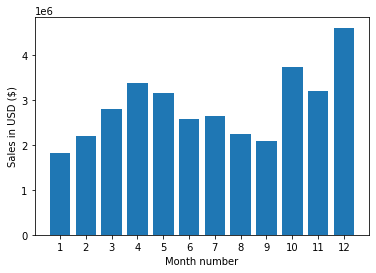

In [12]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


## Question 2: What city had the highest number of sales

In [13]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales,Order Hour
City,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,214264
Austin (TX),11153,1809873.61,69829,1819581.75,141946
Boston (MA),22528,3637409.77,141112,3661642.01,288225
Dallas (TX),16730,2752627.82,104620,2767975.40,214390
Los Angeles (CA),33289,5421435.23,208325,5452570.80,427444
New York City (NY),27932,4635370.83,175741,4664317.43,357696
Portland (ME),2750,447189.25,17144,449758.27,35211
Portland (OR),11303,1860558.22,70621,1870732.34,144421
San Francisco (CA),50239,8211461.74,315520,8262203.91,643265


#### Plot

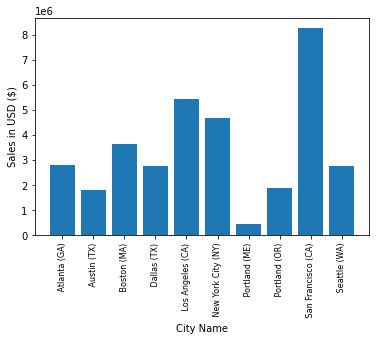

In [14]:
# cities = all_data['City'].unique() This will output cities ordered differently than the sum results
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical',size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

## Question 3: What time should we display ads to maximize likelihood of customer's buying products

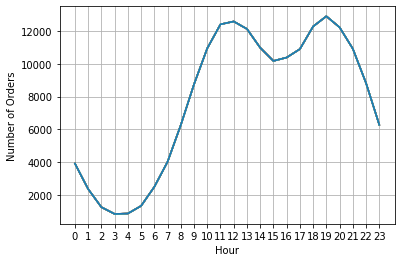

In [24]:
hours = [hour for hour, df in all_data.groupby('Order Hour')]

plt.plot(hours, all_data.groupby('Order Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

## Question 4: What products are most often sold together

In [30]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

/var/folders/jg/9z2r5vjd7wg6q5r01s2ddmbr0000gn/T/ipykernel_26499/1648941683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [36]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for k,v in count.most_common(10):
    print(k, v)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question 5: What product sold the most? and why?

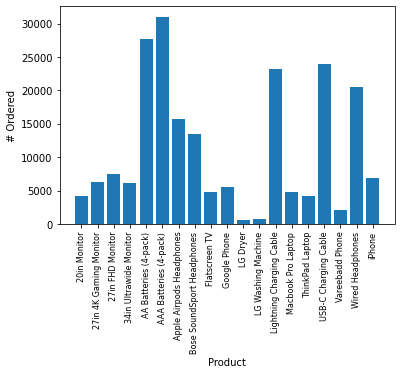

In [45]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('# Ordered')
plt.xlabel('Product')
plt.show()

/var/folders/jg/9z2r5vjd7wg6q5r01s2ddmbr0000gn/T/ipykernel_26499/1318544009.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


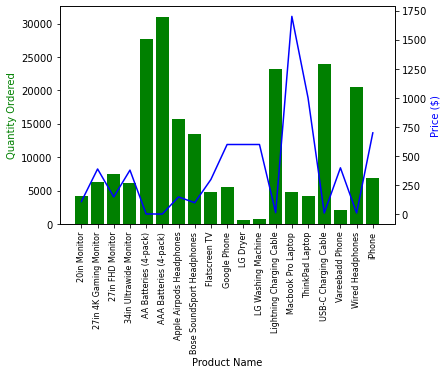

In [57]:
prices = all_data.groupby('Product').mean()['Price Each']
# print(prices)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()
